# Lab 1

## Variant 5
## Group 10



## Introduction
The task involves writing a program that minimizes a given function, $f(x)$, using the straight gradient descent algorithm, in which the program returns the found solution, $x^{*}$ and the number of iterations it took to reach said solution. Following this, a visualization of the function will be presented. During the task, different starting points will be explored in-order to explore in a more detailed approach how the algorithm works, and what its advantages and disadvantages are. We will begin by describing the algorithm.

The straight gradient descent algorithm is based on the following formula:$$x_{i+1} = x_{i} - \alpha \frac{df}{dx_{i}}$$
Where:

$x_{i+1}$ is the next value being calculated

$x_{i}$ is the current value

$\alpha$ is the learning rate

$\frac{df}{dx_{i}}$ is the gradient at $x_{i}$

To implement this algorithmically, let's first introduce an outline of what the function we are interested in minimizing looks like:
```python
def function(x, y)
return 2*np.sin(x) + 3*np.cos(y)
```
And the gradient descent function outline looks like:
```python
def gradient_descent(initial_guess, learning_rate, tol=1e-6, max_iter=1000):
    """
    Gradient descent algorithm
    
    Parameters:
    - initial_guess: initial 2D coordinate vector, the starting points
    - learning_rate: learning rate, alpha
    - tol: tolerance, convergence criteria
    - max_iter: maximum number of iterations

    """
```
The approach to the algorithm that will implement the gradient descent function is as follows:
* initialize a solution vector with $x^{*}$ and $y^{*}$ with respective values from initial guess vector
* initialize a variable n = 1 to track iterations
* for i not exceeding max_iter:
	* calculate $\frac{df(x^*, \ y^*)}{dx^*}$ at $x^{*}$
	* calculate $\frac{df(x^*, \ y^*)}{dy^*}$ at $y^{*}$
	* if $|{\frac{df(x^*, \ y^*)}{dx^*}}|$ and $|{\frac{df(x^*, \ y^*)}{dy^*}}|$ is less than tolerance:
		* return solution vector
	* else update variable solution vector:
		* $x^{*}=x_{i}-\alpha \frac{df(x, \ y)}{dx}$
		* $y^{*}=y_{i}-\alpha \frac{df(x, \ y)}{dy}$
* Otherwise, maximum iterations have been reached

This algorithm is rather simple and converges given that the specified tolerance is achievable. However, the main disadvantage of this algorithm is that it cannot really distinguish between a minima and a maxima. Another disadvantage is that the algorithm stops the moment the magnitude of the gradient is within the tolerance, in addition to the previous problem, it can also get stuck on what is referred to as a "shoulder", which represents a region where the gradient is 0, and thus the function is not changing, but it is next to an extremum, as shown in the picture below:

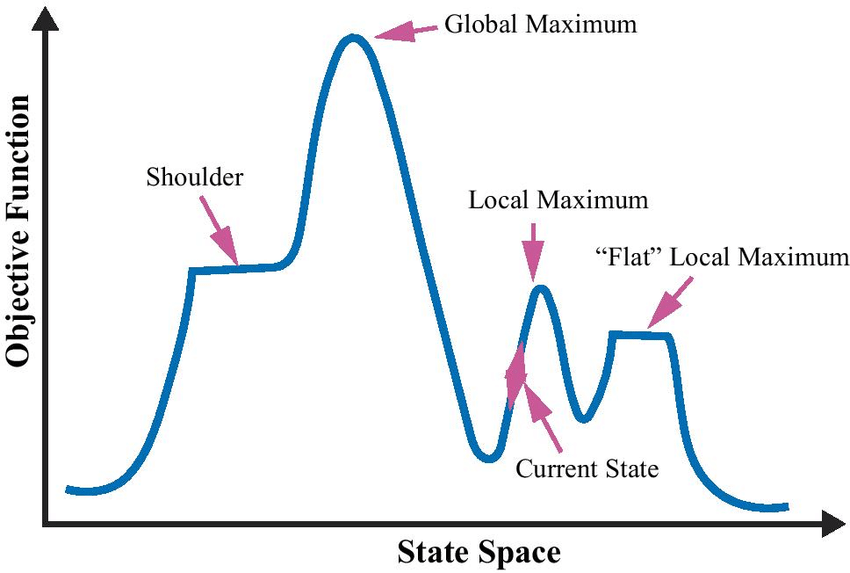

## Implementation

We begin by importing the necessary libraries

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

To define our function within [-5, 5], we need to use the ```np.linspace(begin, end, divisions)``` function, which returns a **divisions** sized vector which starts with **begin** and ends with **end**. Our choice for **divisions** is rather important, as it directly controls what the smallest distance between subsequent numbers are, to explore this idea further, let's consider the following:

In [22]:
divisions = 100000000
x = np.linspace(-5., 5., divisions)
y = np.linspace(-5., 5., divisions)
print(f"({x[1]}) - ({x[0]})")
print(np.abs(x[1] - x[0]))

(-4.999999899999999) - (-5.0)
1.0000000116860974e-07


When using a value of 1,000,000 divisions, then we see that the magnitude of the smallest number that can be represented is $10^{-7}$, as such, this means that we must be rather careful about the choice for our tolerance value, as it might not be representable.

Next, we move on to defining the function for which we would like to find a minima for

In [23]:
def function(x, y):
    return 2*np.sin(x) + 3*np.cos(y)

Next, we need to define a method for calculating the gradient of the function, since this is a function of two variables, it makes sense to define two methods, each of which will take care of calculating the required partial derivatives for each input variable, indeed if we are interested in finding a minima, we are interested in inputs that cause the gradient of the function to be 0: $$\nabla f(\theta) = \textbf{0}$$
Where:

$\theta$ represents the input vector

$\textbf{0}$ here represents the vector which consists of all partial derivatives being 0

If our input vector consists of two inputs, such as x and y in this case, then this will be equivalent to: $$\nabla f(\theta) = [\frac{df(x, \ y)}{dx}=0 \ \frac{df(x, \ y)}{dy}=0]$$

As such, we define the following functions:

In [24]:
def dfdx(xi, yi, h=np.abs(x[1]-x[0])):
    dx = (function(xi+h, yi) - function(xi-h, yi)/(2*h))
    return dx * (2*h)
def dfdy(xi, yi, h=np.abs(y[1]-y[0])):
    dy = (function(xi, yi+h) - function(xi, yi-h)/(2*h))
    return dy * (2*h)

These functions are based on the centered difference theorem for evaluating the derivative, which is as follows: $$f'(x)=\lim_{\Delta x \to\infty} \frac{f(x+\Delta x)-f(x-\Delta x)}{2h}$$
We may extend this definition to account for partial derivatives, which gives us: $$\frac{df(x, \ y)}{dx} = \lim_{\Delta x \to \infty} \frac{f(x + \Delta x, \ y) - f(x - \Delta x, \ y)}{2\Delta x}$$ $$\frac{df(x, \ y)}{dy} = \lim_{\Delta y \to \infty} \frac{f(x, \ y + \Delta y) - f(x, \ y - \Delta y)}{2\Delta y}$$ 
With the necessary pieces gathered, we can now move on to implementing the gradient descent function, which is as follows:

In [25]:
def gradient_descent(initial_guess, learning_rate, tol=1e-6, max_iter=1000):
    sol = initial_guess.copy()                              # create a solution vector based on initial guesses x* and y*
    n = 0
    for n in range(max_iter):                               # Run while maximum iterations have not been reached
        df_dx = dfdx(sol[0], sol[1])                        # Find partial derivative with respect to x
        df_dy = dfdy(sol[0], sol[1])                        # Find partial derivative with respect to y
        if (np.abs(df_dx) < tol) and (np.abs(df_dy) < tol): # Checking whether the magnitude of the partial derivatives are less than tolerance
            minimum = function(sol[0], sol[1])              # At this point, we are at a point where the magnitude of the gradient is less than tolerance (i.e. approximately 0)
            return sol, minimum, (n+1)                               # Return value of function and number of iterations it took to reach the solution
        else:
            sol[0] = sol[0] - (learning_rate * df_dx)         # update x*
            sol[1] = sol[1] - (learning_rate * df_dy)         # update y*
    return "Not Found", "Maximum Iterations Reached", n                  # Maximum iterations reached

The next part of the task is to visualize the function, which will be done using the visualize function, which looks something like:

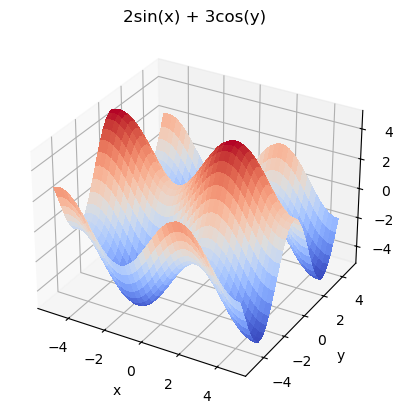

In [32]:
def visualize():
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    xfig = np.arange(-5, 5, 0.25)
    yfig = np.arange(-5, 5, 0.25)
    X, Y = np.meshgrid(xfig, yfig)
    Z = function(X, Y)
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('2sin(x) + 3cos(y)')
    plt.show()
visualize()

Finally, we will put everything together in the following block:

In [ ]:
initial_guess_1 = [-2, 3]
learning_rate_1 = 0.1
tol = 1e-5
max_iterations = 1000
sol, minimum_1, iterations_1 = gradient_descent(initial_guess_1, learning_rate_1, tol, max_iterations)


print(f"Minimum approximation with initial guess {initial_guess_1}: {minimum_1} at {sol}, Iterations: {iterations_1}")

Minimum approximation with initial guess [-2, 3]: -5.853290056700988e-06 at [-3.314350013344143, 1.6856501681436307], Iterations: 22


## Discussion

We will now move on to discuss the results of our findings, and explore other phenomena that will be interesting to find more about. One rather interesting aspect to explore, is the effect of the learning rate on the convergance to a solution. To do so, we will run the gradient descent algorithm with different learning rates, and plot a relationship between the learning rate and the number of iterations, for some specific tolerance:

In [ ]:
# tol = 1e-5
# initial_guess_1 = [-2, 3]
def itr_vs_learn(start, stop, step):
    learning_rates = []         # A list to store the learning rates
    iterations = []             # A list to store the number of iterations
    steps = (stop-start)/step
    for i in range(1, int(steps)+1):
        learning_rate = start + (step * i)
        sol, minimum_1, iterations_1 = gradient_descent(initial_guess_1, learning_rate, tol, max_iterations)
        learning_rates.append(learning_rate)
        iterations.append(iterations_1)
    return learning_rates, iterations

Next, we will use the matplotlib library to create a plot to show the relation between the learning rate and number of iterations needed to reach a solution: 

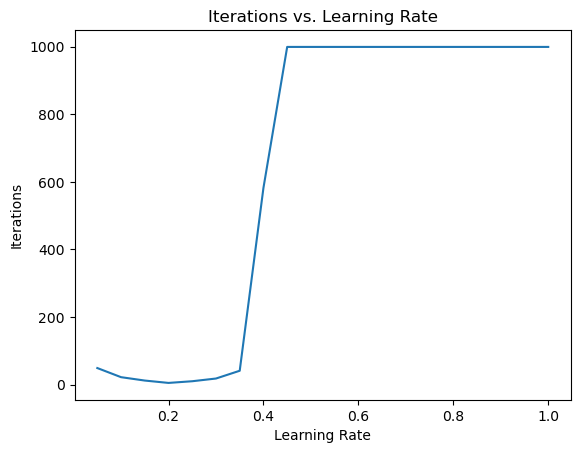

In [ ]:
learning_rates, iterations = itr_vs_learn(0, 1, 0.05)
fig, ax = plt.subplots()
ax.plot(learning_rates, iterations)
plt.xlabel('Learning Rate')
plt.ylabel('Iterations')
plt.title('Iterations vs. Learning Rate')
plt.show()

To explore this phenomena further, we may also investigate how the tolerance may affect this relationship between the learning rate and iterations, let's lower our tolerance and see how our results will look:

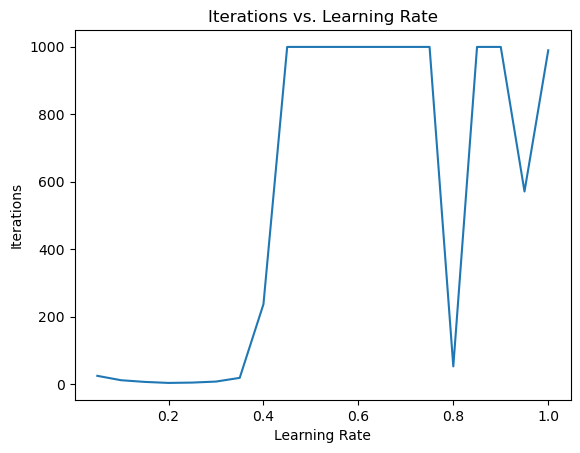

In [ ]:
tol = 1e-2
learning_rates, iterations = itr_vs_learn(0, 1, 0.05)
fig, ax = plt.subplots()
ax.plot(learning_rates, iterations)
plt.xlabel('Learning Rate')
plt.ylabel('Iterations')
plt.title('Iterations vs. Learning Rate')
plt.show()

Quite interestingly, we see that the learning rate has a rather interesting behavior! To gain some more insight, let's experiment with more learning rates:

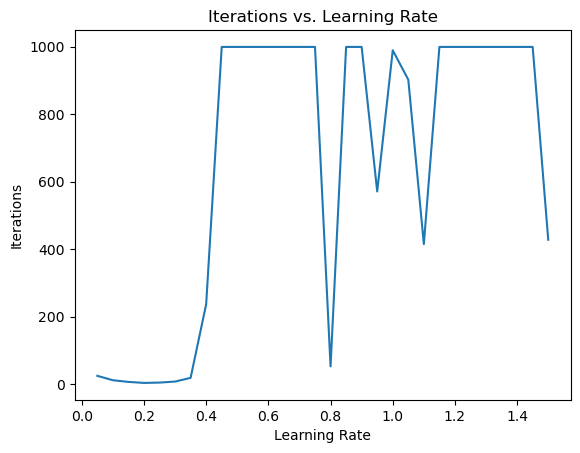

In [ ]:
learning_rates, iterations = itr_vs_learn(0, 1.5, 0.05)
fig, ax = plt.subplots()
ax.plot(learning_rates, iterations)
plt.xlabel('Learning Rate')
plt.ylabel('Iterations')
plt.title('Iterations vs. Learning Rate')
plt.show()

With more learning rates, we discover that even when the tolerance is lowered, there seems to be a rather optimal range of learning rates, located within [0.05, 0.35], lets explore this further by considering the range [0.05, 0.5] but with more steps, as well as setting the tolerance back to its previous value of $10^-5$:

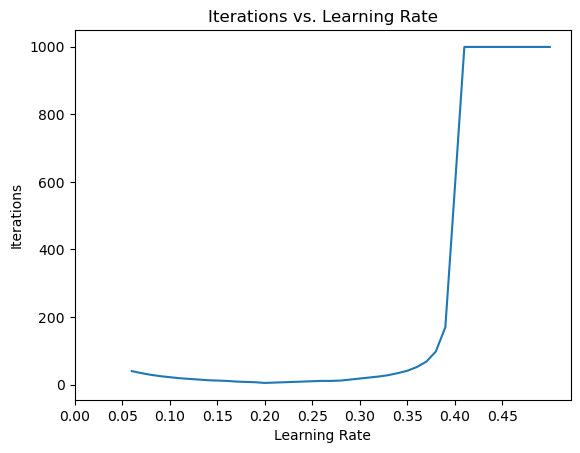

In [ ]:
tol = 1e-5
learning_rates, iterations = itr_vs_learn(0.05, 0.5, 0.01)
fig, ax = plt.subplots()
ax.plot(learning_rates, iterations)
plt.xlabel('Learning Rate')
plt.ylabel('Iterations')
plt.title('Iterations vs. Learning Rate')
xticks = np.arange(0, 0.5, 0.05)
ax.set_xticks(xticks)
plt.show()

We now find that a learning rate of 0.2 seems to be the optimal value. Now, we will try to experiment with as many different initial starting points as possible, in order to determine the different solutions we can obtain using the gradient descent algorithm, as well as to explore how the choices of inputs affect the ability for the algorithm to converge to a solution. To do so, we will try to run as many different combinations of inputs as possible. We will use a random number generator to generate a number between -5 and 5 for each input, and pass it through the gradient descent algorithm:

In [ ]:
def test_gradient(samples, learning_rate, tolerance, max_iterations):
    x_i = [] # A list to hold the x values of the input
    y_i = [] # A list to hold the y values of the input
    x_f = [] # A list to hold the x values of the solution
    y_f = [] # A list to hold the y values of the solution
    for i in range(0, samples):
        xi = np.random.uniform(-5, 5)
        yi = np.random.uniform(-5, 5)
        guess = [xi, yi]
        sol, minimum_1, iterations_1 = gradient_descent(guess, learning_rate, tolerance, max_iterations)
        if type(minimum_1) is not str:
            x_i.append(xi)
            y_i.append(yi)
            x_f.append(sol[0])
            y_f.append(sol[1])
    return x_i, y_i, x_f, y_f

Let's explore what the graph of our 

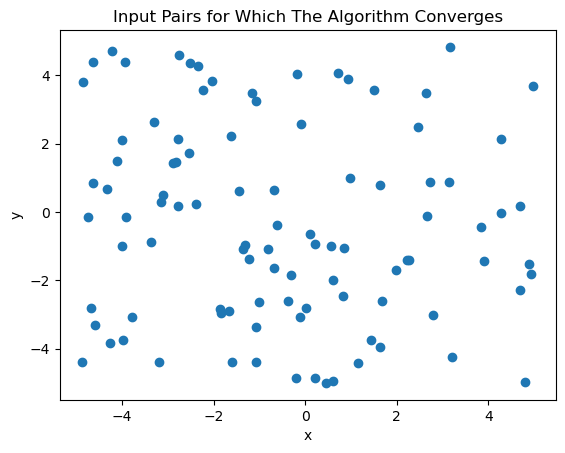

In [ ]:
xi, yi, xf, yf = test_gradient(100, 0.2, 1e-6, 1000)
fig, ax = plt.subplots()
ax.scatter(xi, yi)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Input Pairs for Which The Algorithm Converges')
plt.show()

Similarly, let's explore the x and y pairs of the obtained solutions:

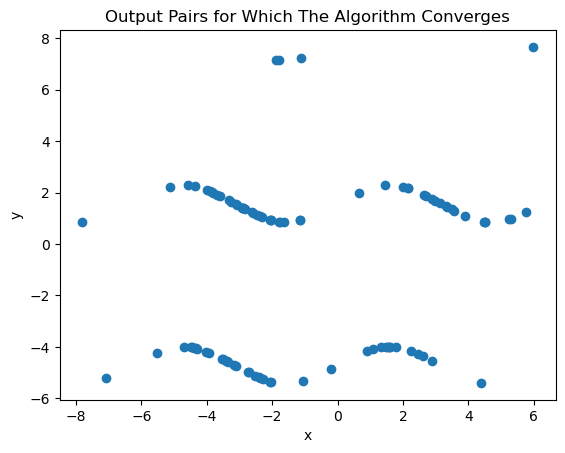

In [ ]:
fig, ax = plt.subplots()
ax.scatter(xf, yf)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Output Pairs for Which The Algorithm Converges')
plt.show()

We can see that a rather interesting phenomenon is appearing! Mainly:
* There seems to be a relatively distribution of x and y pairs that allow the algorithm to converge to a solution
* A periodic pattern is appearing when plotting the (x, y) coordinates of the solutions that are found by the algorithm

However, what if we would like to find the **optimal** input vectors of x and y such that the algorithm converges to a solution in a low number of iterations? We can answer this question by limiting the number of iterations, and allowing the test_gradient function to use a larger number of samples. Let's look at this:

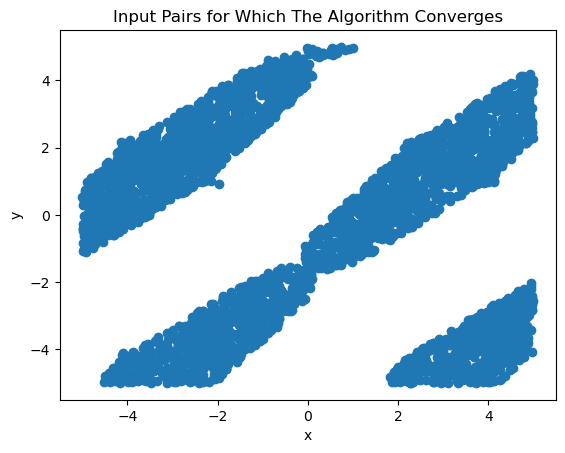

In [ ]:
xi, yi, xf, yf = test_gradient(10000, 0.2, 1e-6, 10) # 10,000 samples, and limited to 10 iterations
fig, ax = plt.subplots()
ax.scatter(xi, yi)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Input Pairs for Which The Algorithm Converges')
plt.show()

We see that areas emerge for which we can describe to be optimal inputs to the algorithm, in the sense that it can converge to a solution in no more than 10 iterations! (The separation between the regions in the graph seems like a nice problem for a machine learning algorithm to analyze, but that's a task for a different day).

Returning back to the periodicity of the outputs, let's set the number of iterations back to 1000, run the test_gradient function with 10,000 samples, and see how the outputs behave!

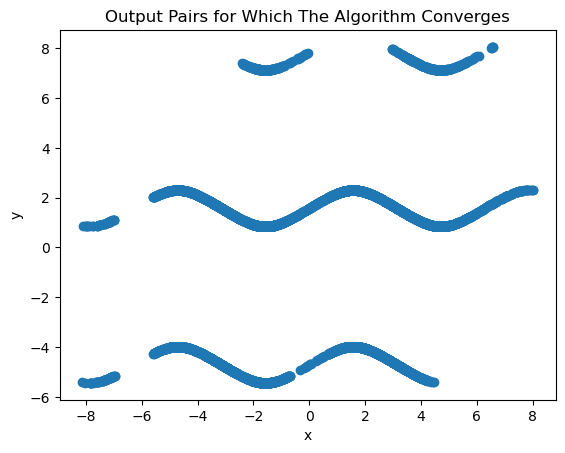

In [ ]:
xi, yi, xf, yf = test_gradient(10000, 0.2, 1e-6, 1000) # 10,000 samples, and limited to 10 iterations
fig, ax = plt.subplots()
ax.scatter(xf, yf)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Output Pairs for Which The Algorithm Converges')
plt.show()

It can be seen that the ouputs have a periodic nature, and this scatterplot shows the periodic nature of the function that we are working with.

## Conclusion

To conclude, the gradient descent algorithm is a powerful tool to optimize a function. As mentioned in the beginning, one of the biggest downsides of this version (the straight gradient descent algorithm) is that the algorithm doesnt actually distinguish between a minima and a maxima, so it would be interesting to explore how that could be remedied. A challenge was figuring out the number of `slices` to use, i.e. the spacing between subsequent numbers of x and y, respectively, as this has a direct influence on the accuracy of the solution. If set too high, then the computational load would get exponentially larger, but if set too low, then it lowers the tolerance of the algorithm, which introduces less acurate results. However, the tolerance also plays a role in the time it takes to converge to a solution. An interesting phenomena was the affect of the learning rate, which as we saw, affected the number of iterations needed to converge to a solution, as such, for each different parameter of the algorithm (including the function itself), there can be an optimal learning rate which works best for that specific circumstance. 